In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [ ]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}
df = pd.DataFrame(data_spam)

In [ ]:
new_email = {'Słowo_1': 'darmowy', 'Słowo_2': 'wygrana', 'Wykrzyknik': 'TAK'}

In [ ]:
# 2. Obliczenia a priori
total = len(df)
counts = df['Spam'].value_counts()
p_spam_tak = counts['TAK'] / total
p_spam_nie = counts['NIE'] / total

print(f"P(Spam=TAK) = {counts['TAK']}/{total} = {p_spam_tak:.3f}")
print(f"P(Spam=NIE) = {counts['NIE']}/{total} = {p_spam_nie:.3f}")

P(Spam=TAK) = 4/12 = 0.333
P(Spam=NIE) = 8/12 = 0.667


In [ ]:
# 3. Obliczenia warunkowe i Score dla nowego emaila
scores = {}
print("\n--- Obliczenia dla nowego emaila ---")

for klasa in ['TAK', 'NIE']:
    df_class = df[df['Spam'] == klasa]
    prob = counts[klasa] / total

    print(f"\nKlasa: {klasa} (Startowy Prior: {prob:.3f})")

    for cecha, wartosc in new_email.items():
        count_feature = len(df_class[df_class[cecha] == wartosc])
        count_class = len(df_class)
        p_feature_given_class = count_feature / count_class

        prob *= p_feature_given_class
        print(f"  P({cecha}={wartosc} | {klasa}) = {count_feature}/{count_class} = {p_feature_given_class:.3f}")

    scores[klasa] = prob
    print(f"  -> Wynik (Score) dla {klasa}: {prob:.6f}")


--- Obliczenia dla nowego emaila ---

Klasa: TAK (Startowy Prior: 0.333)
  P(Słowo_1=darmowy | TAK) = 4/4 = 1.000
  P(Słowo_2=wygrana | TAK) = 2/4 = 0.500
  P(Wykrzyknik=TAK | TAK) = 4/4 = 1.000
  -> Wynik (Score) dla TAK: 0.166667

Klasa: NIE (Startowy Prior: 0.667)
  P(Słowo_1=darmowy | NIE) = 0/8 = 0.000
  P(Słowo_2=wygrana | NIE) = 0/8 = 0.000
  P(Wykrzyknik=TAK | NIE) = 3/8 = 0.375
  -> Wynik (Score) dla NIE: 0.000000


In [ ]:
# 4. Normalizacja
total_score = sum(scores.values())
if total_score > 0:
    p_final_tak = scores['TAK'] / total_score
    p_final_nie = scores['NIE'] / total_score
else:
    p_final_tak, p_final_nie = 0, 0

print("\n--- Wynik Końcowy ---")
print(f"P(Spam=TAK | email) = {p_final_tak:.1%}")
print(f"P(Spam=NIE | email) = {p_final_nie:.1%}")


--- Wynik Końcowy ---
P(Spam=TAK | email) = 100.0%
P(Spam=NIE | email) = 0.0%


In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Kodowanie danych
le_dict = {}
X_encoded = df[['Słowo_1', 'Słowo_2', 'Wykrzyknik']].copy()
for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

y_encoded = LabelEncoder().fit_transform(df['Spam']) # NIE=0, TAK=1

# Trening
clf = CategoricalNB()
clf.fit(X_encoded, y_encoded)

# Kodowanie nowego rekordu
new_vector = [
    le_dict['Słowo_1'].transform(['darmowy'])[0],
    le_dict['Słowo_2'].transform(['wygrana'])[0],
    le_dict['Wykrzyknik'].transform(['TAK'])[0]
]

# Predykcja
probs = clf.predict_proba([new_vector])[0]
print(f"Sklearn P(TAK): {probs[1]:.4f}")
print(f"Sklearn P(NIE): {probs[0]:.4f}")

Sklearn P(TAK): 0.9679
Sklearn P(NIE): 0.0321


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

In [ ]:
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)

1. 15 pacjentów i 8 przypadków (tak)
2. Kaszel = TAK
7/8=0,875 - 8 chorych i 7 ma kaszel
1/7=0,143 - 7 bez grypy i 1 ma kaszel
Gorączka = wysoka
6/8=0,75 - 8 chorych i 6 ma wysoką gorączkę
1/7=0,143 - 7 bez grypy i 1 ma wysoką gorączkę
Zatem obecność kaszlu i wysokiej gorączki silnie sugeruje grypę

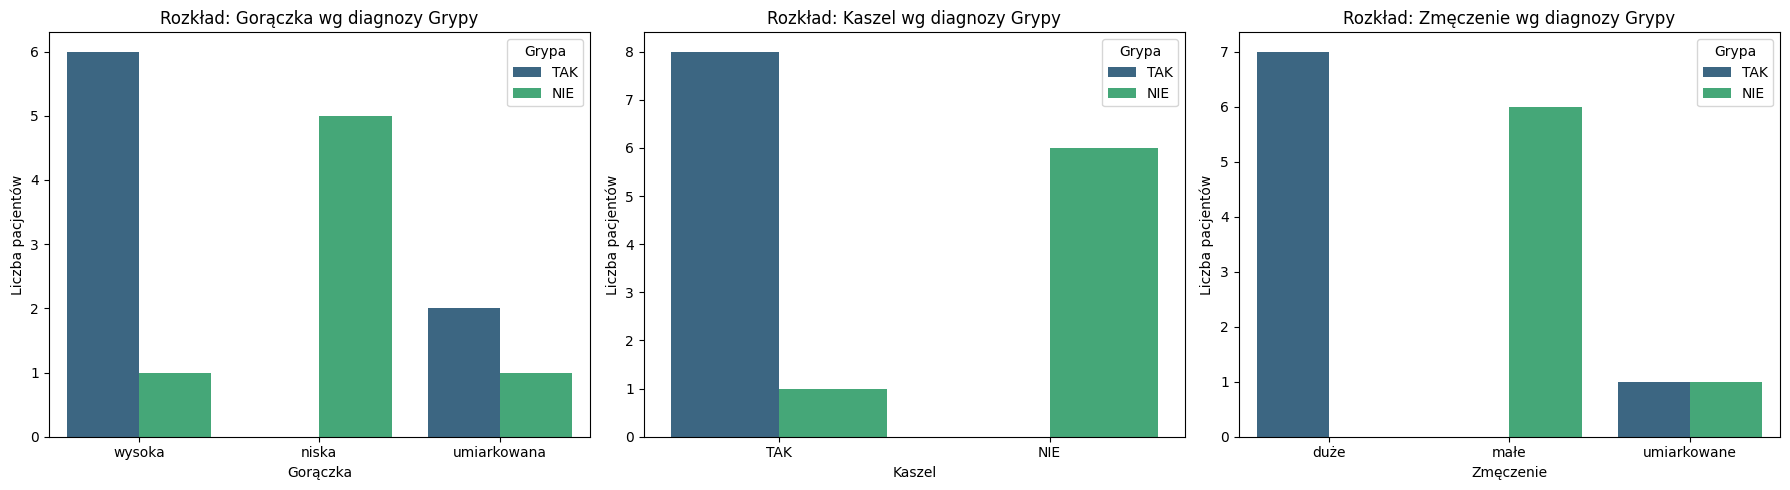

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienie wykresów obok siebie
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(['Gorączka', 'Kaszel', 'Zmęczenie']):
    sns.countplot(data=df_grypa, x=col, hue='Grypa', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Rozkład: {col} wg diagnozy Grypy')
    axes[i].set_ylabel('Liczba pacjentów')

plt.tight_layout()
plt.show()